In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In this project, We would like to predict laptop prices.<br>
Our goal column is "Price_euros", which we want our model to predict.

In [2]:
df = pd.read_csv("laptop_price.csv",  encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Explain attributes - צריך להוסיף!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [11]:
for col in df.columns.to_list()[1:-1]:
    print (" The column", col ,"have", len(df[col].unique()), "unique values.")

 The column Company have 19 unique values.
 The column Product have 618 unique values.
 The column TypeName have 6 unique values.
 The column Inches have 18 unique values.
 The column ScreenResolution have 40 unique values.
 The column Cpu have 118 unique values.
 The column Ram have 9 unique values.
 The column Memory have 39 unique values.
 The column Gpu have 110 unique values.
 The column OpSys have 9 unique values.
 The column Weight have 179 unique values.


We can see that most columns have a lot of different values.<br>
We will try to see if there are any columns that are not needed and we can remove them before running the models.

In [5]:
# there is no need for the laptop_ID column
df.drop(columns = 'laptop_ID',inplace = True)

In [6]:
# in addition, in "Product" column, we have 618 unique values (out of 1302 values).We will remove this column.
df.drop(columns = 'Product',inplace = True)

In [7]:
# removing 'kg' from the 'Weight' column
df["Weight"] = df["Weight"].str.replace("kg","").astype(np.float32)

In [8]:
# removing 'GB' from the 'Ram' column
df["Ram"] = df["Ram"].str.replace("GB","").astype(np.int32)

In [9]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00


### Data Visualization:

##### We will check the price depending on each feature of the laptop.


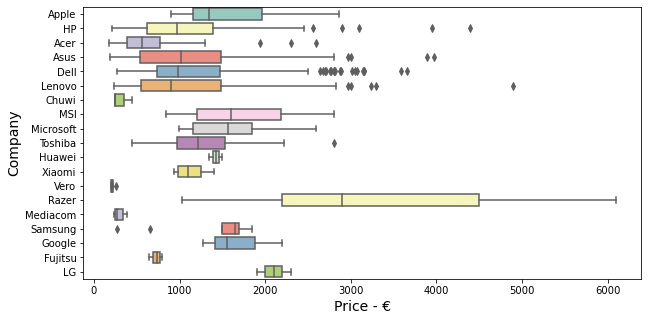

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Price_euros", y="Company", data=df[["Price_euros","Company"]],palette="Set3")
plt.xlabel("Price - €", size=14)
plt.ylabel("Company", size=14)
plt.show()

| Dell | Lenovo | HP | Asus | Acer | MSI | Toshiba | Apple | Samsung | Razer | Mediacom | Microsoft | Xiaomi | Vero | Chuwi | Google | Fujitsu | LG | Huawei |  
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 297 | 297 | 274 | 158 | 103 | 54 | 48 | 21 | 9 | 7 | 7 | 6 | 4 | 4 | 3 | 3 | 3 | 3 | 2 |

##### Company: 
We have more than 1300 laptops, and there are 19 different companies.<br>
There are companies with a large amount of devices (like Lenovo and Dell).<br>
The company with the largest median is the Razer with a median of almost 3000 euros<br>
(keep in mind that it has small sample, only of 7 devices).<br>
Chawi, Vero and Medicom have the cheapest devices.<br>
Some have exceptional values because of the high price (premium products compared to others), Lenovo or HP for example.<br>
It seems that the company that manufactures the device is a factor that can cause the price of the device to change.

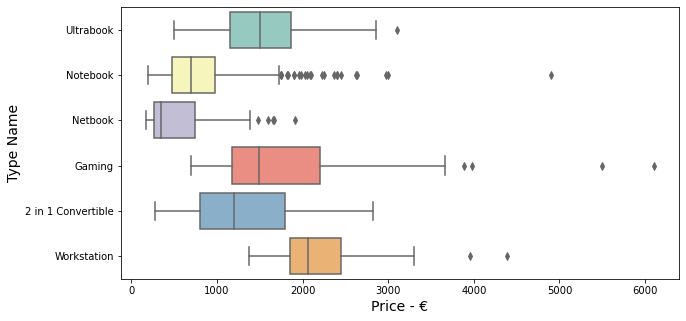

In [66]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Price_euros", y="TypeName", data=df[["Price_euros","TypeName"]],palette="Set3")
plt.xlabel("Price - €", size=14)
plt.ylabel("Type Name", size=14)
plt.show()

In [94]:
df['TypeName'].value_counts()


Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

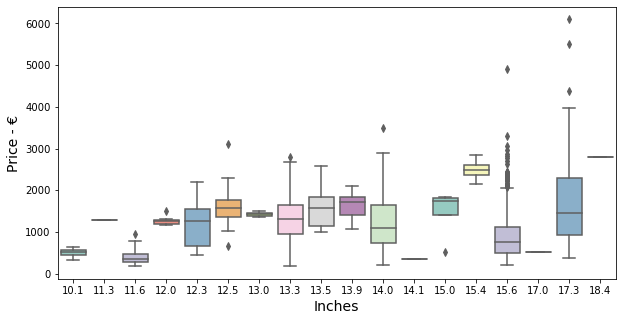

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Inches", y="Price_euros", data=df[["Inches","Price_euros"]],palette="Set3")
plt.xlabel("Inches", size=14)
plt.ylabel("Price - €", size=14)
plt.show()

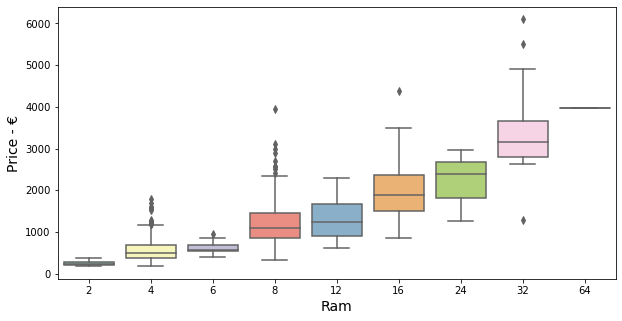

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Ram", y="Price_euros", data=df[["Ram","Price_euros"]],palette="Set3")
plt.xlabel("Ram", size=14)
plt.ylabel("Price - €", size=14)
plt.show()

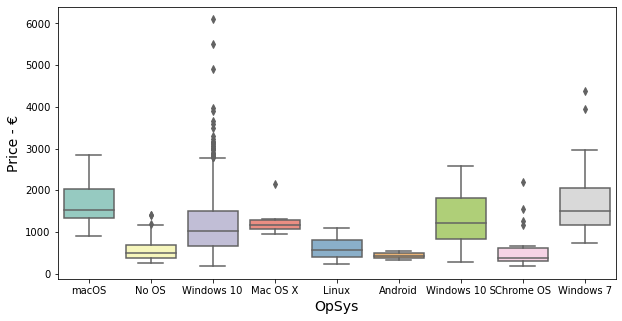

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x="OpSys", y="Price_euros", data=df[["OpSys","Price_euros"]],palette="Set3")
plt.xlabel("OpSys", size=14)
plt.ylabel("Price - €", size=14)
plt.show()

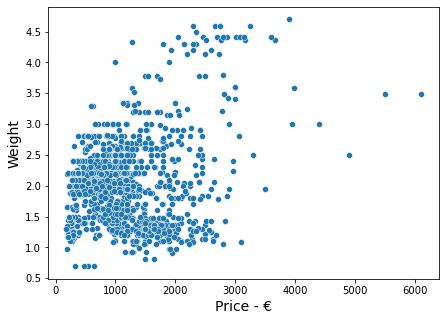

In [74]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Price_euros", y="Weight", data=df[["Price_euros","Weight"]],palette="Set3")
plt.xlabel("Price - €", size=14)
plt.ylabel("Weight", size=14)
plt.show()

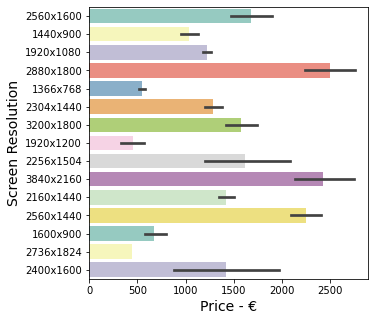

In [86]:
df["ScreenResolution"]=df["ScreenResolution"].astype('string')
df["ScreenResolution"] = df["ScreenResolution"].str.replace('4K', '', regex=True)
df["ScreenResolution"] = df["ScreenResolution"].str.replace('\D', '', regex=True)
def insert_dash(string, index):
    return string[:index] + 'x' + string[index:]
i = 0
for i in range(0,len(df["ScreenResolution"])):
    df["ScreenResolution"][i] = insert_dash(df["ScreenResolution"][i],4)
    i = i +1
plt.figure(figsize=(5,5))
sns.barplot(x="Price_euros", y="ScreenResolution", data=df[["Price_euros","ScreenResolution"]],palette="Set3")
plt.xlabel("Price - €", size=14)
plt.ylabel("Screen Resolution", size=14)
plt.show()